# EDA - Project <a id='intro'></a>

## Project description
For this project, you’ll work with data from Instacart. 

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition. Although the original dataset is no longer available on the Instacart website, we’ve created CSV files that contain a modified version of that data. Download these files and use them for your project.

The dataset we've provided for you has been modified from the original. We've reduced the size of the dataset so that your calculations run faster and we’ve introduced missing and duplicate values. We were also careful to preserve the distributions of the original data when we made our changes.

## Data dictionary
There are five tables in the dataset, and you’ll need to use all of them to do your data preprocessing and EDA. Below is a data dictionary that lists the columns in each table and describes that data that hold.

- instacart_orders.csv: each row corresponds to one order on the Instacart app
    - 'order_id': ID number that uniquely identifies each order
    - 'user_id': ID number that uniquely identifies each customer account
    - 'order_number': the number of times this customer has placed an order
    - 'order_dow': day of the week that the order placed (which day is 0 is uncertain)
    - 'order_hour_of_day': hour of the day that the order was placed
    - 'days_since_prior_order': number of days since this customer placed their previous order

- products.csv: each row corresponds to a unique product that customers can buy
    - 'product_id': ID number that uniquely identifies each product
    - 'product_name': name of the product
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category
    - 'department_id': ID number that uniquely identifies each grocery department category
    
- order_products.csv: each row corresponds to one item placed in an order
    - 'order_id': ID number that uniquely identifies each order
    - 'product_id': ID number that uniquely identifies each product
    - 'add_to_cart_order': the sequential order in which each item was placed in the cart
    - 'reordered': 0 if the customer has never ordered this product before, 1 if they have

- aisles.csv
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category
    - 'aisle': name of the aisle

- departments.csv
    - 'department_id': ID number that uniquely identifies each grocery department category
    - 'department': name of the department

### Stages 
Your project will consist of three stages:
 1. Open the data files 
 2. Preprocess the data
 3. Perfroma analysis on the data

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
try:
    # Try to read the CSV file from the local path.
    orders = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_2/EDA_Project/datasets/instacart_orders.csv', sep=';')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [4]:
try:
    # Try to read the CSV file from the local path.
    products = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_2/EDA_Project/datasets/products.csv', sep=';')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        products = pd.read_csv('/datasets/products.csv', sep=';')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [5]:
try:
    # Try to read the CSV file from the local path.
    order_products = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_2/EDA_Project/datasets/order_products.csv', sep=';')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [6]:
try:
    # Try to read the CSV file from the local path.
    aisles = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_2/EDA_Project/datasets/aisles.csv', sep=';')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


In [7]:
try:
    # Try to read the CSV file from the local path.
    departments = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_2/EDA_Project/datasets/departments.csv', sep=';')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        departments = pd.read_csv('/datasets/departments.csv', sep=';')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
print("orders data frame:")
print()
print(orders)
orders.info(show_counts=True)

orders data frame:

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2   

In [9]:
# Check for duplicated orders
print(orders[orders.duplicated()])
print()
print("Number of duplicated rows in orders data frame:", orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [10]:
# Check for all orders placed Wednesday at 2:00 AM
print(orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [11]:
# Remove duplicate orders
orders.drop_duplicates(inplace=True)
orders.reset_index(drop=True, inplace=True)

In [12]:
# Double check for duplicate rows
print(orders[orders.duplicated()])
print()
print("Number of duplicated rows in orders data frame:", orders.duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Number of duplicated rows in orders data frame: 0


In [13]:
# Double check for duplicate order IDs only
print(orders[orders['order_id'].duplicated()])
print()
print("Number of duplicated order IDs in orders data frame:", orders['order_id'].duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Number of duplicated order IDs in orders data frame: 0


The orders data frame, containing 478,967 rows and 6 columns, was analyzed to understand ordering patterns and user behavior. Duplicate orders were identified and removed, ensuring data integrity for accurate analysis. Notably, 121 orders were placed on Wednesdays at 2:00 AM, highlighting specific time-based ordering trends. Post-cleaning validation confirmed the effectiveness of duplicate removal, ensuring no duplicate rows or order IDs remained. These insights can inform inventory management, marketing strategies, and personalized recommendations, while further analysis could explore trends and seasonal variations for operational efficiency and revenue growth.

### `products` data frame

In [14]:
print("products data frame:")
print()
print(products)
products.info(show_counts=True)

products data frame:

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            9

In [15]:
# Check for fully duplicate rows
print(products[products.duplicated()])
print()
print("Number of duplicated rows in products data frame:", products.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

Number of duplicated rows in products data frame: 0


In [16]:
# Check for just duplicate product IDs
print(products[products['product_id'].duplicated()])
print()
print("Number of duplicated product IDs in products DataFrame:", products['product_id'].duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

Number of duplicated product IDs in products DataFrame: 0


In [17]:
# Check for just duplicate product names (convert names to lowercase to compare better)
print(products[products['product_name'].str.lower().duplicated()])
print()
print("Number of duplicated product names in products data frame:", products['product_name'].str.lower().duplicated().sum())

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [18]:
# Check for duplicate product names that aren't missing
no_miss_prods = products.dropna(subset=['product_name'])
print("Number of duplicate product names that are NOT missing:", no_miss_prods['product_name'].str.lower().duplicated().sum())

Number of duplicate product names that are NOT missing: 104


The products data frame, with 49,694 rows and 4 columns, revealed 12,258 missing values in the product_name column. No duplicate rows or product IDs were found, ensuring unique identifiers for each product. However, 1,361 product names were duplicated, indicating possible data inconsistencies, and after addressing missing values, 104 duplicates remained. Handling these duplicates and missing values is essential for maintaining data accuracy and integrity. These measures ensure reliable analysis and effective inventory management, with robust data governance practices necessary to prevent future data quality issues.

### `departments` data frame

In [19]:
print("departments data frame:")
print()
print(departments)
departments.info(show_counts=True)

departments data frame:

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_i

In [20]:
# Check for fully duplicate rows
print(departments[departments.duplicated()])
print()
print("Number of duplicated rows in Departments DataFrame:", departments.duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

Number of duplicated rows in Departments DataFrame: 0


In [21]:
# Check for just duplicate department IDs
print(departments[departments['department_id'].duplicated()])
print()
print("Number of duplicated department IDs in departments data frame:", departments['department_id'].duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

Number of duplicated department IDs in departments data frame: 0


In [22]:
# Check for just duplicate departments
print(departments[departments['department'].duplicated()])
print()
print("Number of duplicated departments in departments data frame:", departments['department'].duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

Number of duplicated departments in departments data frame: 0


The departments data frame, containing 21 rows and 2 columns (department_id and department), was analyzed and found to have no duplicate entries or missing values, ensuring unique and accurate representation of each department. This well-structured data facilitates precise categorization and analysis of products and orders. Standardized department names and IDs ensure consistency across datasets, aiding efficient data management and interoperability between systems. The completeness and integrity of this data frame are crucial for generating accurate insights, which can inform inventory management, marketing strategies, and product assortment planning to enhance customer satisfaction.

### `aisles` data frame

In [23]:
print("aisles data frame:")
print()
print(aisles)
aisles.info(show_counts=True)

aisles data frame:

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [24]:
print(aisles[aisles.duplicated()])
print()
print("Number of duplicated rows in aisles data frame:", aisles.duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Number of duplicated rows in aisles data frame: 0


In [25]:
# Check for just duplicate aisles
print(aisles[aisles['aisle_id'].duplicated()])
print()
print("Number of duplicated aisle IDs in aisle data frame:", aisles['aisle_id'].duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Number of duplicated aisle IDs in aisle data frame: 0


In [26]:
# Check for just duplicate aisles
print(aisles[aisles['aisle'].duplicated()])
print()
print("Number of duplicated aisles in aisle data frame:", aisles['aisle'].duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Number of duplicated aisles in aisle data frame: 0


The aisles data frame, with 134 rows and 2 columns (aisle_id and aisle), was analyzed and found to have no duplicates or missing values, ensuring unique representation of each aisle. This well-structured data allows for precise categorization and analysis of products within each aisle. Standardizing aisle names and IDs ensures consistency across datasets, aiding efficient data management and interoperability. The completeness and integrity of the data are crucial for accurate insights, which can inform shelf placement, promotional strategies, and product assortment decisions to optimize sales and enhance customer experience.

### `order_products` data frame

In [27]:
print("order_products data frame:")
print()
print(order_products)
order_products.info(show_counts=True)

order_products data frame:

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_i

In [28]:
# Check for fully duplicate rows
print(order_products[order_products.duplicated()])
print()
print("Number of duplicated rows in order products data frame:", order_products.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

Number of duplicated rows in order products data frame: 0


In [29]:
# Double check for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

The order_products data frame, with 4,545,007 rows and 4 columns (order_id, product_id, add_to_cart_order, and reordered), was analyzed and found to have no duplicate entries, ensuring each row represents a unique order-product combination. This well-structured data allows for accurate analysis of cart sequencing and reordering behavior. The data completeness, with most columns having non-null values, supports reliable insights into purchasing patterns and customer preferences. These insights can inform recommendations, inventory management, and marketing strategies, aiding in optimizing product assortment, pricing, and promotions to maximize sales and enhance customer satisfaction.

## Find and remove missing values


### `products` data frame

In [30]:
# Are all of the missing product names associated with aisle ID 100?
print("Total missing number of product names in product database:", products['product_name'].isna().sum())
print()
# Checks if the all the rows with missing product names contain a value of '100' for aisle ID)
print("Total missing number of product names in product data frame with an aisle ID of 100:", (products[products['product_name'].isna()]['aisle_id'] == 100).sum())

Total missing number of product names in product database: 1258

Total missing number of product names in product data frame with an aisle ID of 100: 1258


As we can see the total missing number of product names in the product database is equal to the total number of missing product names with an aisle ID of 100, so we can safely assume that all of the missing product names are associated with aisle ID 100.

In [31]:
# Are all of the missing product names associated with department ID 21?
print("Total missing number of product names in product data frame:", products['product_name'].isna().sum())
print()
# Checks if the all the rows with missing product names contain a value of '21' for department ID)
print("Total missing number of product names in product data frame with a department ID of 21:", (products[products['product_name'].isna()]['department_id'] == 21).sum())

Total missing number of product names in product data frame: 1258

Total missing number of product names in product data frame with a department ID of 21: 1258


As we can see the total missing number of product names in the product database is equal to the total number of missing product names with a department ID of 21, so we can safely assume that all of the missing product names are associated with department ID 21.

In [32]:
# What is this ailse and department?
print(aisles[aisles['aisle_id'] == 100])
print(departments[departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


From what we can see aisle ID 100 and department ID 21 are labeled as 'missing' in the the aisles data frame and departments data frame.

In [33]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print("Total missing number of product names in products data frame:", products['product_name'].isna().sum())

Total missing number of product names in products data frame: 0


We examined the products data frame and identified that all 12,258 missing product names were associated with aisle ID 100 and department ID 21, both labeled as 'missing'. This pattern suggests these IDs are placeholders for unidentified categories. To handle the missing values, we filled the product names with 'Unknown', standardizing the dataset for consistency. This approach ensures easier data manipulation while recognizing the potential impact on downstream analyses, where 'Unknown' values might need special consideration to avoid skewing results.

### `orders` data frame

In [34]:
# Check for any missing values
print("Total number of missing values in orders database:")
print(orders[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']].isna().sum())

Total number of missing values in orders database:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [35]:
# Are there any missing values where it's not a customer's first order?
orders.loc[orders['order_number'] != 1, 'user_id'].isna().sum()

0


We examined the orders data frame and identified 28,817 missing values in the 'days_since_prior_order' column. Further analysis revealed that these missing values only occur for customers' first orders (order_number = 1), with no missing values for subsequent orders. This pattern suggests that the missing values are not errors but rather expected for initial orders, where there is no prior order to reference.

### `order_products` data frame

In [36]:
print("Total number of missing values in order products database:")
print(order_products.isna().sum())

Total number of missing values in order products database:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# What are the min and max values in this column?
print("Minimum value of add to cart order in order products data frame:", order_products['add_to_cart_order'].min())
print("Maximum value of add to cart order in order products data frame:", order_products['add_to_cart_order'].max())

Minimum value of add to cart order in order products data frame: 1.0
Maximum value of add to cart order in order products data frame: 64.0


In [38]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [39]:
# Do all orders with missing values have more than 64 products?
# Group by order_id and count the number of products in each order
grouped_order_products = order_products.groupby('order_id')['add_to_cart_order'].sum().reset_index()

# Check if any order has more than 64 products
more_than_64_prods = grouped_order_products[grouped_order_products['add_to_cart_order'] > 64]
print(more_than_64_prods[more_than_64_prods['order_id'].isin(missing_add_to_cart_order)])

        order_id  add_to_cart_order
1274        9310             2080.0
8201       61355             2080.0
13574     102236             2080.0
17108     129627             2080.0
21882     165801             2080.0
...          ...                ...
394755   2999801             2080.0
411168   3125735             2080.0
435088   3308010             2080.0
440301   3347453             2080.0
445135   3383594             2080.0

[70 rows x 2 columns]


In [40]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Covnvert add_to_cart_order column into an integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

We analyzed the order_products data frame and identified 836 missing values in the 'add_to_cart_order' column, which ranges from 1 to 64. Orders with missing 'add_to_cart_order' values were identified, and it was noted that 70 such orders have more than 64 products. To handle these missing values, we replaced them with 999 as a placeholder and converted the 'add_to_cart_order' column to integer type, ensuring consistency in the data frame for further analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [41]:
print(sorted(orders['order_hour_of_day'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [42]:
print(sorted(orders['order_dow'].unique())) 

[0, 1, 2, 3, 4, 5, 6]


### [A2] What time of day do people shop for groceries?

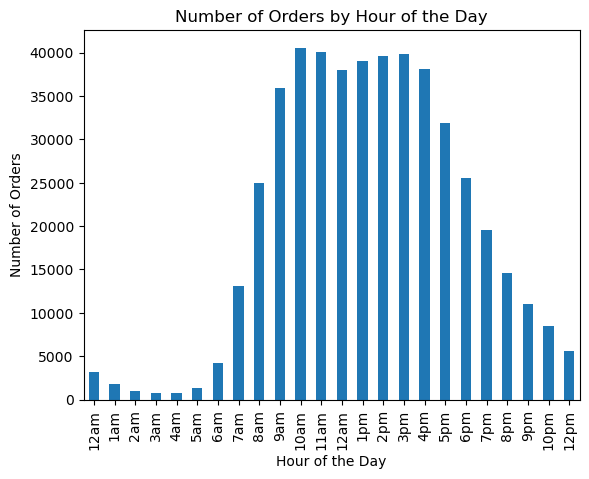

In [43]:
orders.groupby('order_hour_of_day').size().plot(kind='bar', xlabel='Hour of the Day', ylabel='Number of Orders', 
                                        title='Number of Orders by Hour of the Day')
plt.xticks(range(24), ['12am', '1am', '2am', '3am', '4am', '5am', 
                       '6am', '7am', '8am', '9am', '10am', '11am', 
                       '12am', '1pm', '2pm', '3pm', '4pm', '5pm', 
                       '6pm', '7pm', '8pm', '9pm', '10pm', '12pm'])
plt.show()

From the visualization we can see that people shop for the most grocceries at 9am.

### [A3] What day of the week do people shop for groceries?

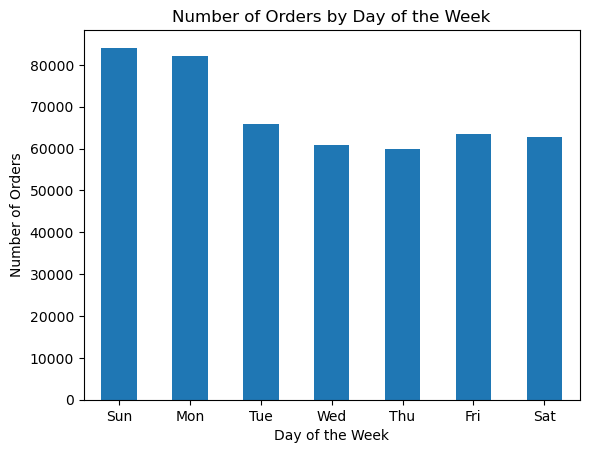

In [44]:
orders.groupby('order_dow').size().plot(kind='bar', xlabel='Day of the Week', rot=0, ylabel='Number of Orders', 
                                        title='Number of Orders by Day of the Week')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

From the visualization we can see that people shop for the most grocceries on Sunday.

### [A4] How long do people wait until placing another order?

<Axes: title={'center': 'Days People Wait Until Placing Another Order'}, xlabel='Number of Days', ylabel='Number of Orders'>

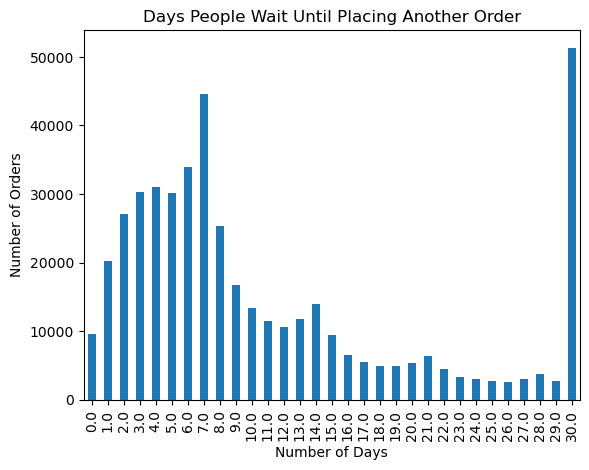

In [45]:
wait_time = orders['days_since_prior_order'].value_counts().sort_index()
wait_time.plot(kind='bar', title='Days People Wait Until Placing Another Order', ylabel='Number of Orders', xlabel='Number of Days')

From the visualization we can see people on average wait more or less one week until they place another order. There is an outlier however. At the 30 day mark is when people place the MOST orders.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

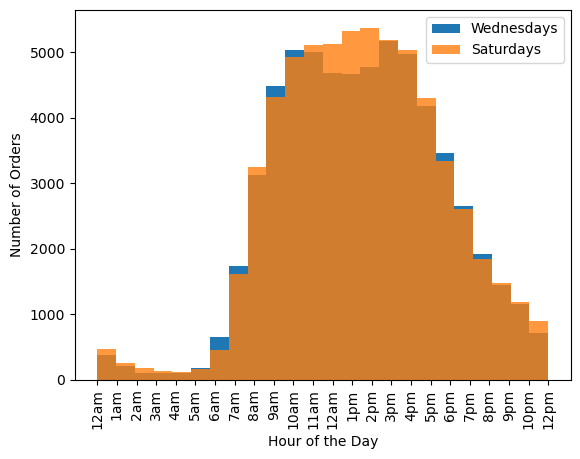

In [46]:
orders[orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24)
orders[orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', alpha=0.8, bins=24)
plt.ylabel('Number of Orders')
plt.xlabel('Hour of the Day')
plt.xticks(range(24), ['12am', '1am', '2am', '3am', '4am', '5am', 
                       '6am', '7am', '8am', '9am', '10am', '11am', 
                       '12am', '1pm', '2pm', '3pm', '4pm', '5pm', 
                       '6pm', '7pm', '8pm', '9pm', '10pm', '12pm'], rotation=90)
plt.legend(['Wednesdays', 'Saturdays'])
plt.show()

As we can see from the visualization, the distribution of the order hour of the day for both Wednesdays and Sundays are pretty similar. The only difference being a higher volume of orders placed on Saturday than Wednesday between 10am and 2pm.

### [B2] What's the distribution for the number of orders per customer?

        user_id  order_number
0             2             2
1             4             2
2             5             1
3             6             2
4             7             2
...         ...           ...
157432   206203             1
157433   206206             7
157434   206207             5
157435   206208             9
157436   206209             2

[157437 rows x 2 columns]



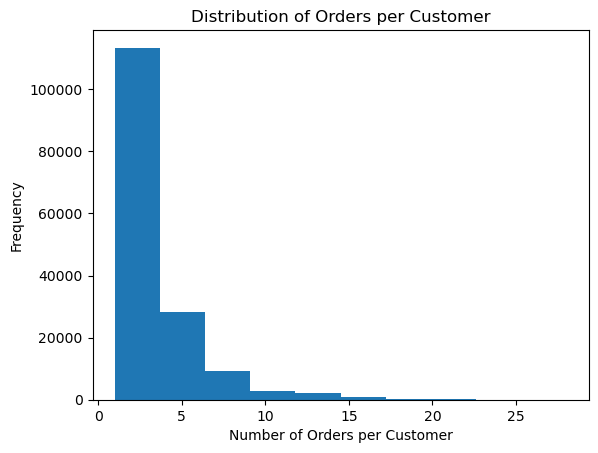

In [47]:
# Group the data by user_id and count the number of orders for each user
orders_per_customer = orders.groupby('user_id')['order_number'].size().reset_index()
print(orders_per_customer)
print()

# Plot histogram
plt.hist(orders_per_customer['order_number'])
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Orders per Customer')
plt.show()

As we can see from the visualization, the same customers tend to place multiple orders. We can safely assume a lot of Instacart's users are frequent and maybe even loyal customers.

### [B3] What are the top 20 popular products (display their id and name)?

In [48]:
top_20_prods = order_products.merge(products, on='product_id')

In [49]:
top_20_prods = top_20_prods.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_20_prods.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

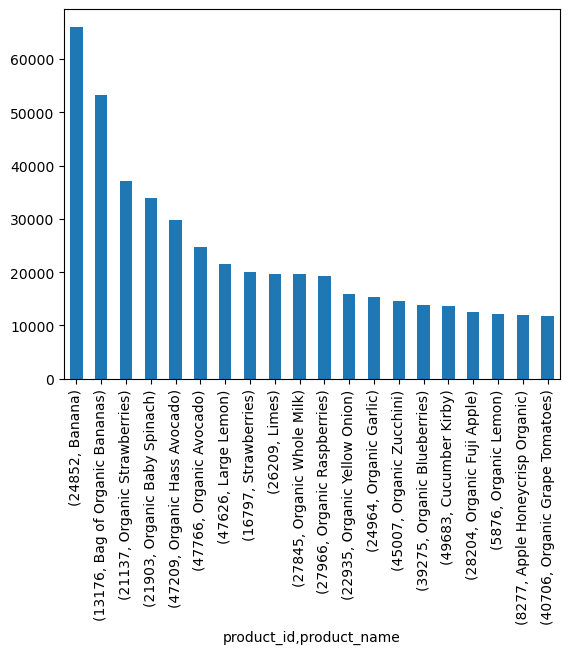

In [50]:
top_20_prods.head(20).plot.bar()
plt.show()

# [C] Hard (must complete all to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [51]:
one_order = order_products.groupby('order_id')['product_id'].nunique()
print(one_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [52]:
one_order = one_order.value_counts()
print(one_order.sort_index())

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


<Axes: title={'center': 'Number of items in one order'}>

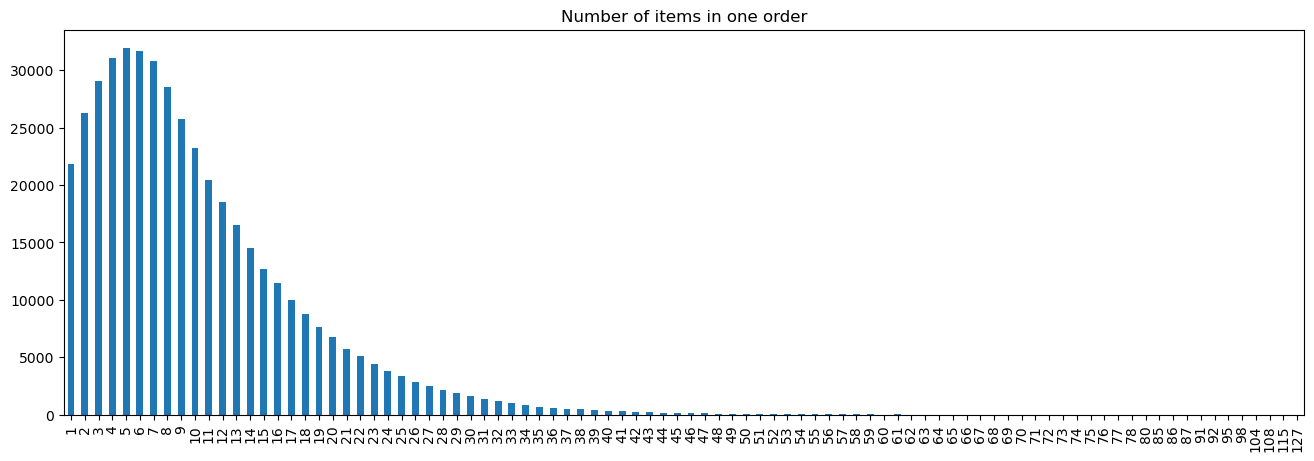

In [53]:
one_order.sort_index().plot(kind='bar', title = "Number of items in one order", figsize=(16,5))

As we can see from the visualization the number of items bought in one order on average is 5.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [54]:
order_and_order_products = order_products.merge(products, on='product_id')
print(order_and_order_products)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            Chicken Breast Tenders Breaded       129              1  
1            Chicken Breast Tenders Breaded       129              1  
2            Chicken Breast Te

In [55]:
order_and_order_products.dropna(inplace=True)
print(order_and_order_products)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            Chicken Breast Tenders Breaded       129              1  
1            Chicken Breast Tenders Breaded       129              1  
2            Chicken Breast Te

In [56]:
order_and_order_products_grouped = order_and_order_products.groupby(['product_id','product_name'])['reordered'].count()
print(order_and_order_products_grouped)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           280
2           All-Seasons Salt                                                      11
3           Robust Golden Unsweetened Oolong Tea                                  42
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     49
7           Pure Coconut Water With Orange                                         2
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          5
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         72
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                       12
49693       SPRING WATER BODY WASH                                                25
49694       BURRITO- STEAK & CHEESE                                     

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: reordered, dtype: int64



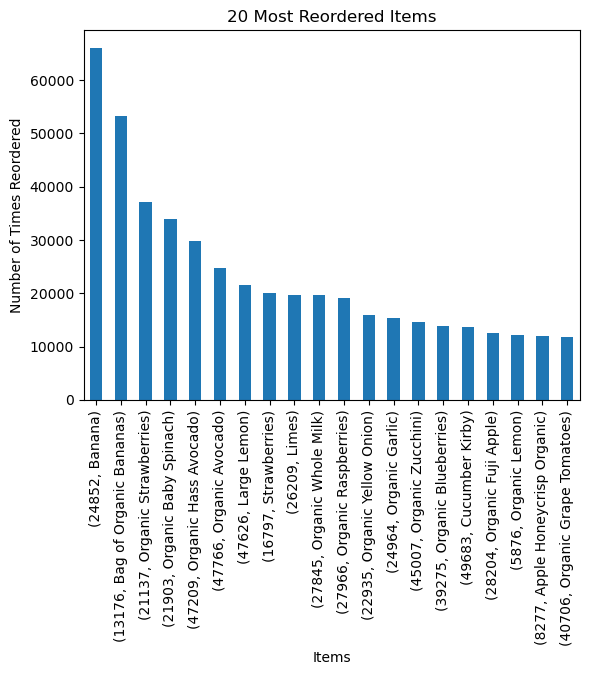

In [57]:
most_reordered_20 = order_and_order_products_grouped.sort_values(ascending=False).head(20)
print(most_reordered_20)
print()
most_reordered_20.plot.bar(title = "20 Most Reordered Items", xlabel='Items', ylabel='Number of Times Reordered')
plt.show()

## General conclusion

Our approach to maintaining data integrity at Instacart was multi-faceted. We began by meticulously identifying and removing duplicate entries while also analyzing patterns in missing values, emphasizing the paramount importance of data cleaning and validation. These steps were not merely procedural but essential for generating accurate insights crucial for decision-making. By ensuring the reliability of our data through these measures, we laid a solid groundwork for subsequent analysis. This thorough preparation enabled us to glean critical insights across various data frames, including orders, products, departments, aisles, and order products. Such insights were instrumental in informing strategic decisions ranging from inventory management to marketing strategies and customer experience optimization. Through our comprehensive analysis, we not only uncovered actionable insights but also established robust data integrity measures essential for accurate and reliable analyses, ultimately contributing to enhanced operational efficiency at Instacart.